<Figure size 432x288 with 0 Axes>

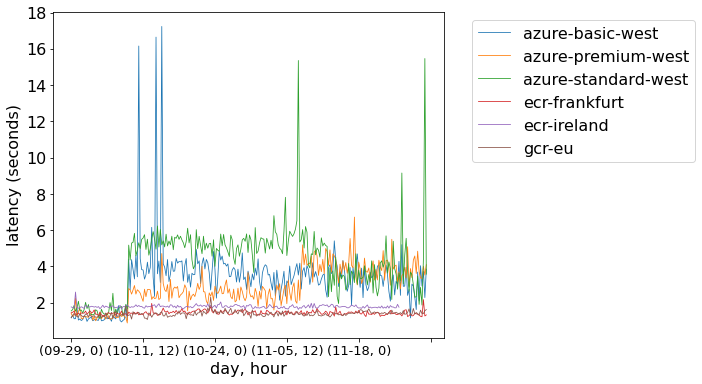

<Figure size 432x288 with 0 Axes>

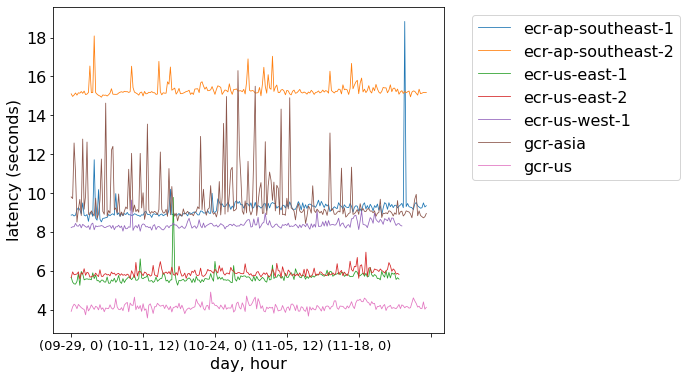

<Figure size 432x288 with 0 Axes>

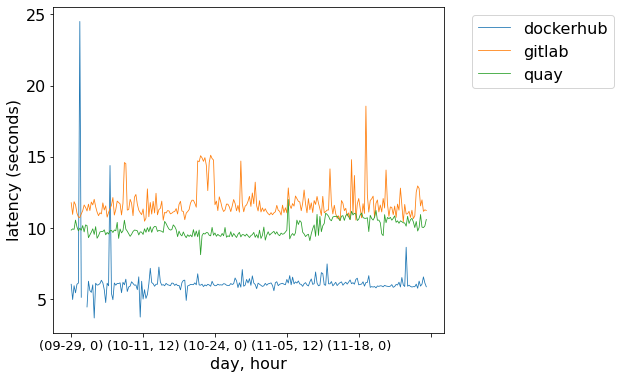

In [14]:
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

SMALL_SIZE = 10
MEDIUM_SIZE = 13
BIGGER_SIZE = 16
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

us_asia = ['gcr-asia', 'gcr-us', 'ecr-us-east-1', 'ecr-us-east-2', 'ecr-us-west-1', 'ecr-ap-southeast-1', 'ecr-ap-southeast-2']
europe = ['ecr-frankfurt', 'ecr-ireland', 'azure-basic-west', 'azure-standard-west', 'azure-premium-west', 'gcr-eu']
public = ['gitlab', 'quay','dockerhub']

df_pull = pd.read_csv('full-measurements-long-running-pull.csv')
df_push = pd.read_csv('full-measurements-long-running-push.csv')

df_us_asia_pull = df_pull[df_pull['platform'].isin(us_asia)]
df_eu_pull = df_pull[df_pull['platform'].isin(europe)]
df_public_pull = df_pull[df_pull['platform'].isin(public)]


plt.figure()
df_eu_pull = df_eu_pull[df_eu_pull.latency < 30]
df_eu_pull.groupby(['day','hour','platform']).sum()['latency'].unstack().plot(figsize=(7,6), lw=0.8)

plt.ylabel('latency (seconds)')
plt.xlabel('day, hour')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('long-running-eu-pull.png', bbox_inches='tight')


plt.figure()

df_us_asia_pull.groupby(['day','hour','platform']).sum()['latency'].unstack().plot(figsize=(7,6), lw=0.8)

plt.ylabel('latency (seconds)')
plt.xlabel('day, hour')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('long-running-us-asia-pull.png', bbox_inches='tight')

plt.figure()
df_public_pull.groupby(['day','hour','platform']).sum()['latency'].unstack().plot(figsize=(7,6), lw=0.8)
plt.ylabel('latency (seconds)')
plt.xlabel('day, hour')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('long-running-public-pull.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

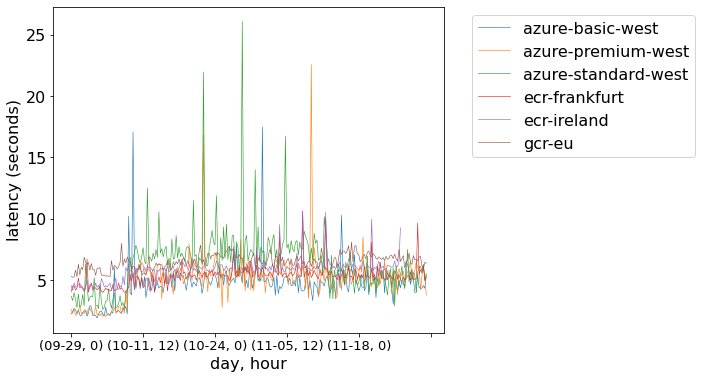

<Figure size 432x288 with 0 Axes>

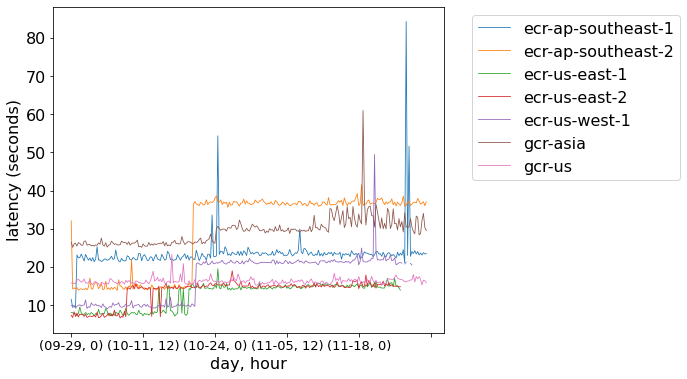

<Figure size 432x288 with 0 Axes>

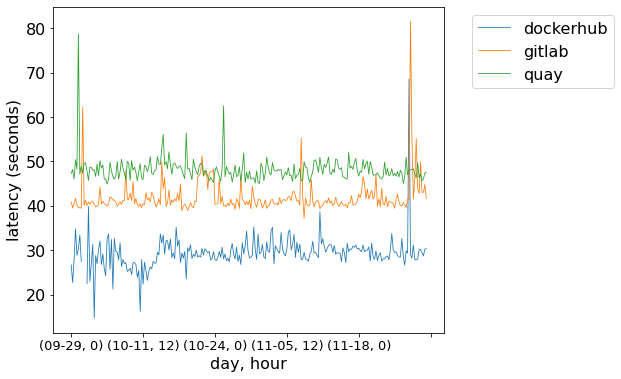

In [19]:
df_us_asia_push = df_push[df_push['platform'].isin(us_asia)]
df_eu_push = df_push[df_push['platform'].isin(europe)]
df_public_push = df_push[df_push['platform'].isin(public)]


plt.figure()
df_eu_push = df_eu_push[df_eu_push.latency < 30]
df_eu_push.groupby(['day','hour','platform']).sum()['latency'].unstack().plot(figsize=(7,6), lw=0.6)
plt.ylabel('latency (seconds)')
plt.xlabel('day, hour')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('long-running-eu-push.png', bbox_inches='tight')

plt.figure()
df_us_asia_push = df_us_asia_push[df_us_asia_push.latency < 60]
df_us_asia_push.groupby(['day','hour','platform']).sum()['latency'].unstack().plot(figsize=(7,6), lw=0.8)
plt.ylabel('latency (seconds)')
plt.xlabel('day, hour')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('long-running-us-asia-push.png', bbox_inches='tight')

plt.figure()
df_public_push.groupby(['day','hour','platform']).sum()['latency'].unstack().plot(figsize=(7,6), lw=0.8)
plt.ylabel('latency (seconds)')
plt.xlabel('day, hour')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('long-running-public-push.png', bbox_inches='tight')